请点击下方按钮上传 '10_Portfolios_Prior_12_2.csv' ...


Saving 10_Portfolios_Prior_12_2.csv to 10_Portfolios_Prior_12_2 (6).csv


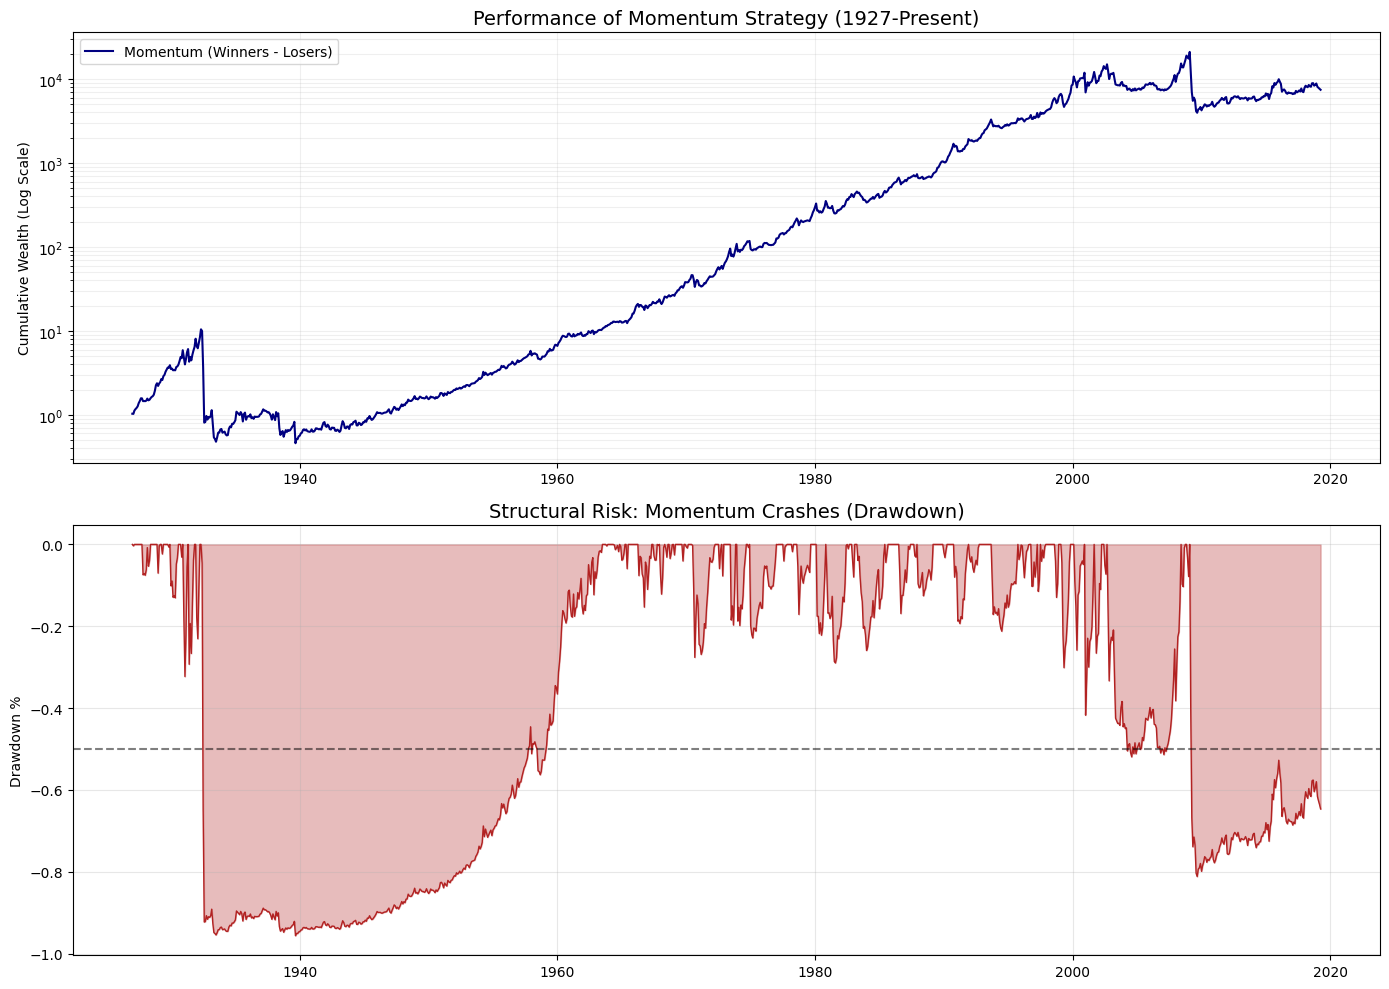


论文引用数据 (Evidence for Essay):
2009 max drawdown; 2009年最大回撤 (Crisis): -81.15%
Max drawdown of all history; 全历史最大回撤: -95.60%


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

# ==========================================
# 0. 手动上传文件 (必做)
# ==========================================
print("请点击下方按钮上传 '10_Portfolios_Prior_12_2.csv' ...")
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# ==========================================
# 1. 精确读取与清洗 (Data Cleaning)
# ==========================================
# skiprows=10: 跳过前10行说明文字
df = pd.read_csv(io.BytesIO(uploaded[filename]), skiprows=10)

# 重命名第一列为 Date
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# 去除列名里的多余空格
df.columns = df.columns.str.strip()

# 强制转换 Date 列为字符串，以便解析
df['Date'] = df['Date'].astype(str)

# === 关键步骤：过滤掉文件底部的垃圾数据 ===
# 只保留 Date 列是 6 位数字的行 (YYYYMM)
df = df[df['Date'].str.match(r'^\d{6}$')]

# 解析日期
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df.set_index('Date', inplace=True)

# 强制转换为数值类型
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# === 核心修正：单位换算 ===
# 你的数据是 -3.32 (百分数)，必须除以 100 变成 -0.0332
df = df / 100

# ==========================================
# 2. 构建动量策略 (WML)
# ==========================================
# 赢家 = Hi PRIOR (第10组), 输家 = Lo PRIOR (第1组)
df['Momentum_Strategy'] = df['Hi PRIOR'] - df['Lo PRIOR']

# 计算累积收益 (Log scale 看起来更专业)
df['Cumulative_Wealth'] = (1 + df['Momentum_Strategy']).cumprod()

# 计算回撤 (Drawdown) - 这是你的核心证据
df['Running_Max'] = df['Cumulative_Wealth'].cummax()
df['Drawdown'] = (df['Cumulative_Wealth'] / df['Running_Max']) - 1

# ==========================================
# 3. 可视化：生成论文需要的图表
# ==========================================
plt.figure(figsize=(14, 10))

# 图1: 累积收益
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Cumulative_Wealth'], color='navy', label='Momentum (Winners - Losers)')
plt.title('Performance of Momentum Strategy (1927-Present)', fontsize=14)
plt.yscale('log') # 使用对数坐标
plt.ylabel('Cumulative Wealth (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()

# 图2: 回撤 (深坑)
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Drawdown'], color='firebrick', linewidth=1)
plt.fill_between(df.index, df['Drawdown'], 0, color='firebrick', alpha=0.3)
plt.title('Structural Risk: Momentum Crashes (Drawdown)', fontsize=14)
plt.ylabel('Drawdown %')
plt.axhline(-0.5, color='black', linestyle='--', alpha=0.5) # 50% 回撤线
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 4. 打印证据数据 (Evidence)
# ==========================================
print("\n" + "="*40)
print("论文引用数据 (Evidence for Essay):")
print("="*40)

# 尝试获取特定年份的回撤
try:
    crash_2009 = df['Drawdown']['2009-01':'2009-12'].min()
    print(f"2009 max drawdown; 2009年最大回撤 (Crisis): {crash_2009:.2%}")

except:
    print("数据时间范围未覆盖 2009 或 2020，请检查 CSV。")

print(f"Max drawdown of all history; 全历史最大回撤: {df['Drawdown'].min():.2%}")
print("="*40)